In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import preprocessing as preprocess
import grouping as group
import spliting as split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
""""Directory
bigcon 
  |- data
       |- 01_제공데이터
       |- 02_평가데이터
"""
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'data')
source_dir = os.path.join(cur_dir, 'source')
data_train_dir = os.path.join(data_dir, '01_제공데이터')
data_test_dir = os.path.join(data_dir, '02_평가데이터')


""" Parameters
"""
headline = '2020 빅콘테스트 데이터분석분야-챔피언리그'
train_target = '2019년 실적데이터'
test_target = '2020년 6월 판매실적예측데이터(평가데이터)'
rate_target = '시청률 데이터'


""" Load Data
"""
dfs = preprocess.ProcessSale(
    data_dir = data_dir,
    source_dir = source_dir,
    data_train_dir = data_train_dir,
    data_test_dir = data_test_dir,
    headline = headline,
    train_target = train_target,
    rate_target = rate_target,
    test_target = test_target,
)

df_train = dfs.train_preprocess()
df_test = dfs.test_preprocess()
df_rate = dfs.rate_preprocess()

Grouping = group.Grouping(df_train, df_test)
df_train = Grouping.make_train()
df_test = Grouping.make_test()

Train : file already exist!
Test : file already exist!
train data : 38309
test data : 2891


In [3]:
words = ['여성','무스탕','밍크','라쿤양가죽','쿠션퍼자켓,','롱베스트','남녀',
         '머스크랫','쿠션자켓','원피스','에스닉','앙상블','블라우스',
        '휘메일','쉬폰','플리츠','롱블라우스','티블라우스',
        '여자','전지현', '핸드백','노벨라백','토트백','밍크','여성백','숄더백',
        '버킷백','리스틀릿','파일백','사첼','호보백','크로스바디백','모터백',
        '미란다백','스카프','플랫슈즈']

In [4]:
df_girl = df_train.copy()

In [6]:
df_girl = df_girl[df_girl.product_grp.isin(['건강기능', '속옷', '의류', '침구'])]

In [9]:
df_girl.index = range(len(df_girl))

In [11]:
for i in range(len(df_girl)) : 
    if any(word in df_girl.loc[i,'product_name'] for word in words) : df_girl.loc[i, 'girl'] = True
    else : df_girl.loc[i, 'girl'] = False

df_girl.head(15)

,datetime,year,month,day,hour,minute,weekday,holiday,month_order,order_grp,exposure(min),mother_cd,product_cd,product_name,product_grp,temp,rainfall,wind_speed,wind_direction,humidity,pressure,spot_pressure,sea_level_pressure,snowfall,unit_price,sell_price,sales_cnt,group,unit_price_group,cpi,csi,girl
0,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,초,시작,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,2099000.0,52.606516,group4,cheap,100.8,97.5,False
1,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,초,시작,20.0,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,4371000.0,109.548872,group4,cheap,100.8,97.5,True
2,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,초,중간,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,3262000.0,81.754386,group4,cheap,100.8,97.5,False
3,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,초,중간,20.0,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6955000.0,174.310777,group4,cheap,100.8,97.5,True
4,2019-01-01 06:40:00,2019,1,1,6,40,Tuesday,1,초,마지막,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6672000.0,167.218045,group4,cheap,100.8,97.5,False
5,2019-01-01 06:40:00,2019,1,1,6,40,Tuesday,1,초,마지막,20.0,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,9337000.0,234.010025,group4,cheap,100.8,97.5,True
6,2019-01-01 07:00:00,2019,1,1,7,0,Tuesday,1,초,시작,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,-7.7,0.0,1.3,320.0,58.0,2.0,1023.1,1034.4,0.0,59000.0,6819000.0,115.576271,group4,cheap,100.8,97.5,False
7,2019-01-01 07:20:00,2019,1,1,7,20,Tuesday,1,초,중간,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,-7.7,0.0,1.3,320.0,58.0,2.0,1023.1,1034.4,0.0,59000.0,15689000.0,265.915254,group4,cheap,100.8,97.5,False
8,2019-01-01 07:40:00,2019,1,1,7,40,Tuesday,1,초,마지막,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,-7.7,0.0,1.3,320.0,58.0,2.0,1023.1,1034.4,0.0,59000.0,25370000.0,430.000000,group4,cheap,100.8,97.5,False
9,2019-01-01 08:00:00,2019,1,1,8,0,Tuesday,1,초,시작,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,-7.7,0.0,0.9,360.0,57.0,2.0,1023.0,1034.3,0.0,59900.0,16133000.0,269.332220,group4,medium,100.8,97.5,False


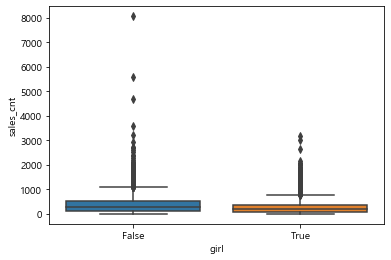

In [13]:
sns.boxplot(x=df_girl.girl, y=df_girl.sales_cnt)

In [14]:
df_girl.groupby(['girl'])['sales_cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
girl,,,,,,,,
False,7689.0,375.469533,349.168053,2.958159,134.148297,285.732165,519.147870,8070.401003
True,2002.0,301.075432,353.478432,1.343373,87.282701,184.227468,364.897959,3193.545151
